# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | sao joao da barra
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | raduzhny
Processing Record 8 of Set 1 | alaghsas
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | pico truncado
Processing Record 12 of Set 1 | kolonia town
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ouanaminthe
Processing Record 15 of Set 1 | kristiansund
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | awjilah
Processing Record 19 of Set 1 | nago
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | kununurra
Processing Record 39 of Set 4 | mount pearl
Processing Record 40 of Set 4 | weno
Processing Record 41 of Set 4 | sarangani
Processing Record 42 of Set 4 | castillos
Processing Record 43 of Set 4 | dudinka
Processing Record 44 of Set 4 | afaahiti
Processing Record 45 of Set 4 | mumbwa
Processing Record 46 of Set 4 | summerside
Processing Record 47 of Set 4 | rio claro
Processing Record 48 of Set 4 | rongelap
Processing Record 49 of Set 4 | correntina
Processing Record 0 of Set 5 | bela vista
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | kuqa
Processing Record 3 of Set 5 | navrongo
Processing Record 4 of Set 5 | iskateley
Processing Record 5 of Set 5 | pucheng
Processing Record 6 of Set 5 | cockburn town
Processing Record 7 of Set 5 | tan-tan
Processing Record 8 of Set 5 | hudiksvall
Processing Record 9 of Set 5 | mount vernon
Processing Record 10 of Set 5 | barra de santo antonio
Processing Record 11 of Set 5 | pisco
Proce

Processing Record 34 of Set 8 | kem'
Processing Record 35 of Set 8 | thinadhoo
Processing Record 36 of Set 8 | udachny
Processing Record 37 of Set 8 | tazovsky
Processing Record 38 of Set 8 | saudarkrokur
Processing Record 39 of Set 8 | vorkuta
Processing Record 40 of Set 8 | yagry
City not found. Skipping...
Processing Record 41 of Set 8 | medicine hat
Processing Record 42 of Set 8 | 'ain merane
Processing Record 43 of Set 8 | mugia
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | cape coast
Processing Record 46 of Set 8 | tshikapa
Processing Record 47 of Set 8 | strezhevoy
Processing Record 48 of Set 8 | hailar
Processing Record 49 of Set 8 | iwanai
Processing Record 0 of Set 9 | bundaberg north
Processing Record 1 of Set 9 | ta`u
Processing Record 2 of Set 9 | bozoum
Processing Record 3 of Set 9 | chui
Processing Record 4 of Set 9 | hunchun
Processing Record 5 of Set 9 | amga
Processing Record 6 of Set 9 | aasiaat
Processing Record 7 of Set 9 | greenwood
Proc

Processing Record 24 of Set 12 | cocal
Processing Record 25 of Set 12 | kitgum
Processing Record 26 of Set 12 | pangody
Processing Record 27 of Set 12 | conception bay south
Processing Record 28 of Set 12 | boca suno
Processing Record 29 of Set 12 | nacozari de garcia
Processing Record 30 of Set 12 | xai-xai
Processing Record 31 of Set 12 | serowe
Processing Record 32 of Set 12 | malango
Processing Record 33 of Set 12 | bogen
Processing Record 34 of Set 12 | ad dilinjat
Processing Record 35 of Set 12 | figuig (centre)
Processing Record 36 of Set 12 | aldinga beach
Processing Record 37 of Set 12 | yilan
Processing Record 38 of Set 12 | kerman
Processing Record 39 of Set 12 | haslev
Processing Record 40 of Set 12 | tidjikja
Processing Record 41 of Set 12 | lent'ekhi
Processing Record 42 of Set 12 | pyay
Processing Record 43 of Set 12 | kannod
Processing Record 44 of Set 12 | fray luis a. beltran
Processing Record 45 of Set 12 | general cabrera
Processing Record 46 of Set 12 | fuyu
------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,14.72,96,100,9.14,SH,1697284059
1,stanley,54.8680,-1.6985,10.71,58,0,9.26,GB,1697284053
2,waitangi,-43.9535,-176.5597,12.68,92,40,3.58,NZ,1697284062
3,sao joao da barra,-21.6403,-41.0511,22.05,87,100,6.02,BR,1697284198
4,albany,42.6001,-73.9662,8.23,91,100,1.20,US,1697283795


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.72,96,100,9.14,SH,1697284059
1,stanley,54.8680,-1.6985,10.71,58,0,9.26,GB,1697284053
2,waitangi,-43.9535,-176.5597,12.68,92,40,3.58,NZ,1697284062
3,sao joao da barra,-21.6403,-41.0511,22.05,87,100,6.02,BR,1697284198
4,albany,42.6001,-73.9662,8.23,91,100,1.20,US,1697283795


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

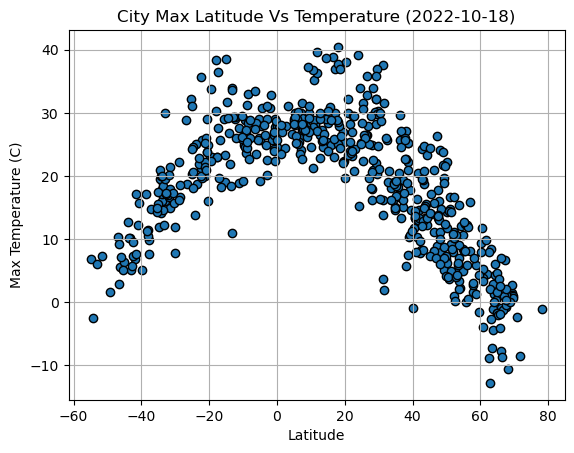

In [8]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = "black",)
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude Vs Temperature (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

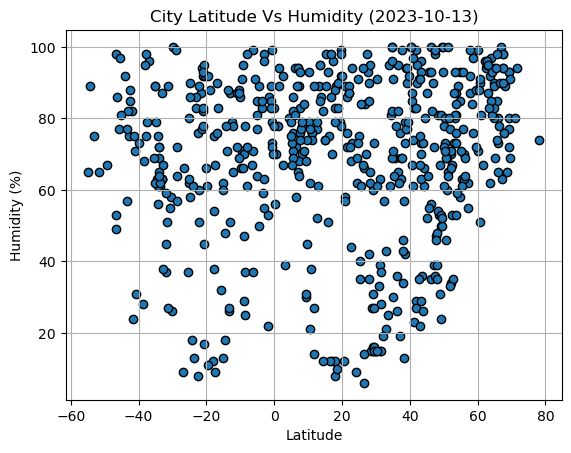

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, edgecolors= "black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs Humidity (2023-10-13)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

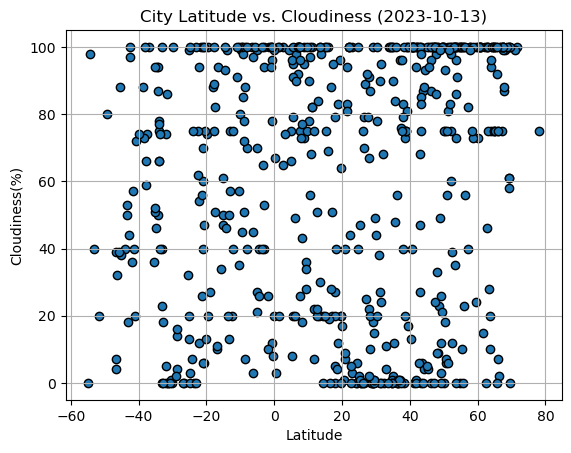

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (2023-10-13)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

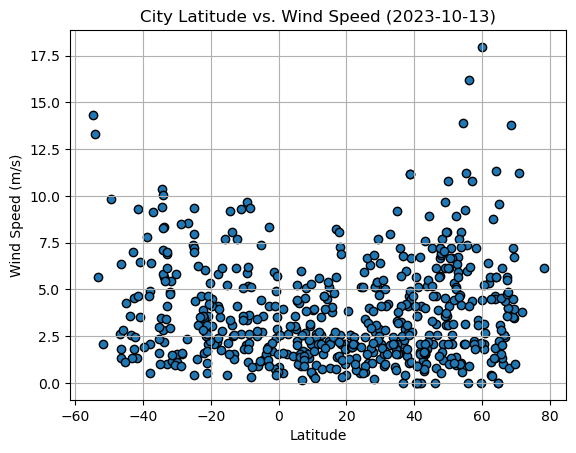

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-10-13)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)

#linregression = x_values * slope + intercept

#line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,10.71,58,0,9.26,GB,1697284053
4,albany,42.6001,-73.9662,8.23,91,100,1.20,US,1697283795
6,raduzhny,62.0961,77.4750,4.52,96,100,5.32,RU,1697284198
7,alaghsas,17.0187,8.0168,36.94,12,51,8.23,NE,1697284198
8,keflavik,64.0049,-22.5624,1.24,93,75,5.66,IS,1697284063


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.72,96,100,9.14,SH,1697284059
2,waitangi,-43.9535,-176.5597,12.68,92,40,3.58,NZ,1697284062
3,sao joao da barra,-21.6403,-41.0511,22.05,87,100,6.02,BR,1697284198
5,papatowai,-46.5619,169.4708,2.92,98,39,1.81,NZ,1697284057
9,invercargill,-46.4000,168.3500,5.57,86,32,1.34,NZ,1697284059


###  Temperature vs. Latitude Linear Regression Plot

The R value is: -0.8529988885952017


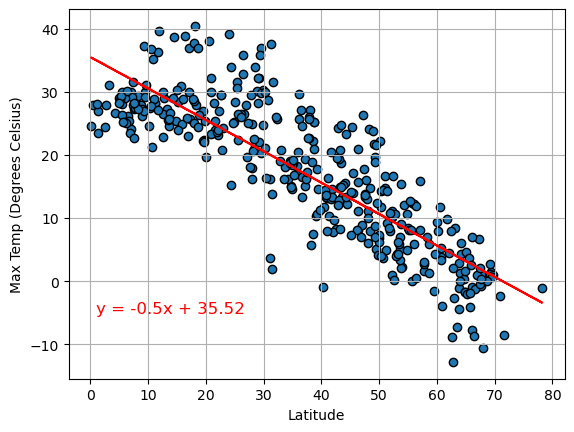

In [15]:
# Linear regression on Northern Hemisphere
#define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
linregression = x_values * slope + intercept
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Degrees Celsius)")
print(f'The R value is: {rvalue}')

#plot scatter & line
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, linregression, "r-")
plt.annotate(line_graph,(1,-5), fontsize= 12, color = "red")
plt.grid()



The R value is: 0.7914158511696142


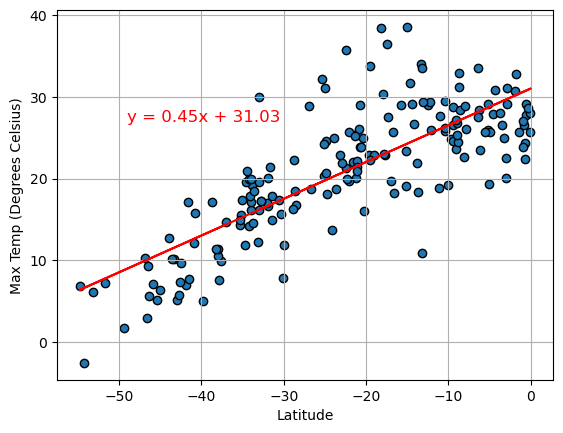

In [16]:
# Linear regression on Southern Hemisphere
#define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
linregression = x_values * slope + intercept
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Degrees Celsius)")
print(f'The R value is: {rvalue}')

#plot scatter & line
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, linregression, "r-")
plt.annotate(line_graph,(-49,27), fontsize= 12, color = "red")
plt.grid()

**Discussion about the linear relationship:** These two graphs show how as we approach a latitude of "0" the max temperature tends to increase. This is due to the latitude of "0" being the equator, where temperatures are warmer on earth, and the further away we get from 0 in either direction, the closer we get to the North & South poles where temperatures are colder. 

### Humidity vs. Latitude Linear Regression Plot

The R value is: 0.15590185350590047


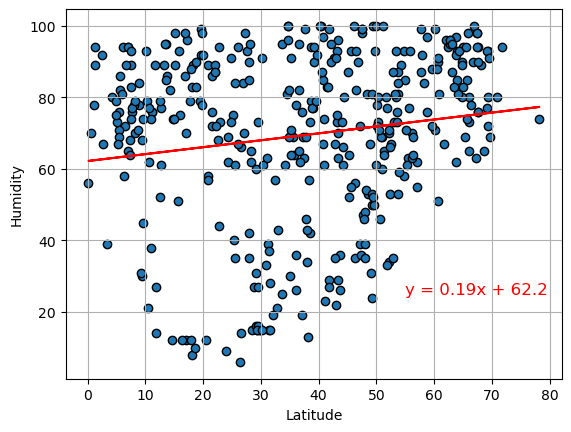

In [17]:
# Northern Hemisphere
#define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
linregression = x_values * slope + intercept
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The R value is: {rvalue}')

#plot scatter & line
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, linregression, "r-")
plt.annotate(line_graph,(55,25), fontsize= 12, color = "red")
plt.grid()

The R value is: 0.007673525557099267


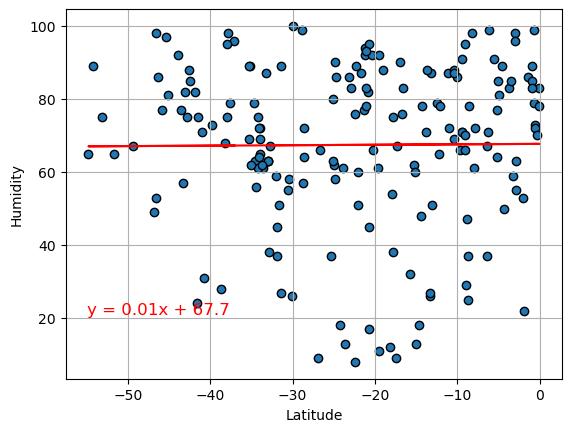

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
linregression = x_values * slope + intercept
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The R value is: {rvalue}')

#plot scatter & line
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, linregression, "r-")
plt.annotate(line_graph,(-55,21), fontsize= 12, color = "red")
plt.grid()

**Discussion about the linear relationship:** Looking at the two graphs, there is a slightly positive correlation in the Northern hemisphere, and a very slightly negative correlation in the Southern hemisphere, but there is not a strong enough correlation to say that Latitude and Humidity have a significant impact on each other. 

### Cloudiness vs. Latitude Linear Regression Plot

The R value is: 0.16032703224425


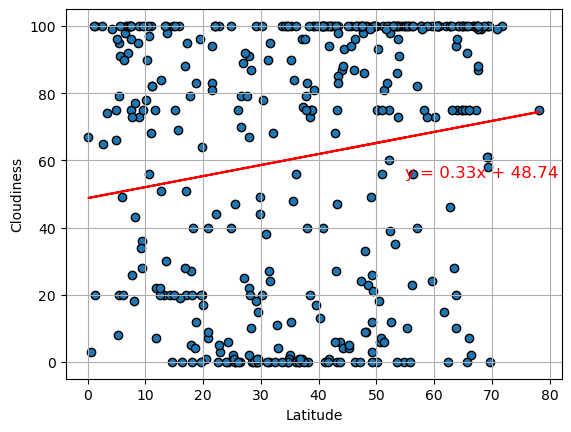

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
linregression = x_values * slope + intercept
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The R value is: {rvalue}')

#plot scatter & line
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, linregression, "r-")
plt.annotate(line_graph,(55,55), fontsize= 12, color = "red")
plt.grid()

The R value is: 0.1919700688014553


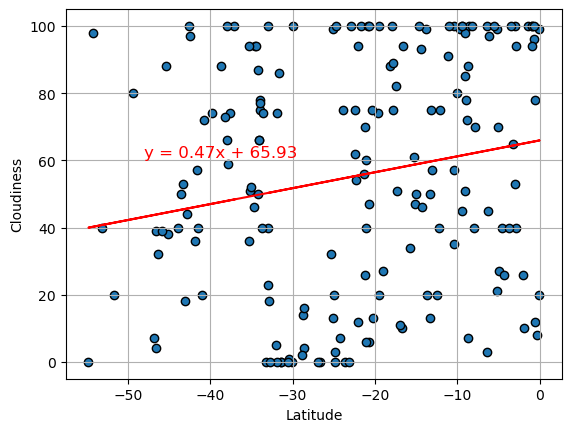

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
linregression = x_values * slope + intercept
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The R value is: {rvalue}')

#plot scatter & line
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, linregression, "r-")
plt.annotate(line_graph,(-48,61), fontsize= 12, color = "red")
plt.grid()

**Discussion about the linear relationship:** Again, from both the plots of the Northern and Southern hemispheres, we see extremely miniscule linear relationships, and because of this we cannot draw a correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The R value is: 0.2689578875494045


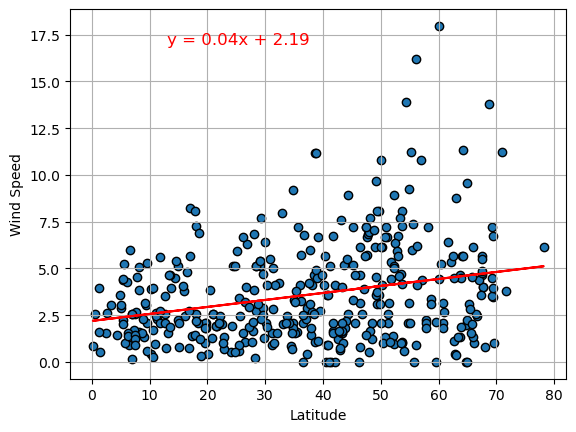

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
linregression = x_values * slope + intercept
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The R value is: {rvalue}')

#plot scatter & line
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, linregression, "r-")
plt.annotate(line_graph,(13,17), fontsize= 12, color = "red")
plt.grid()

The R value is: -0.23745032568686641


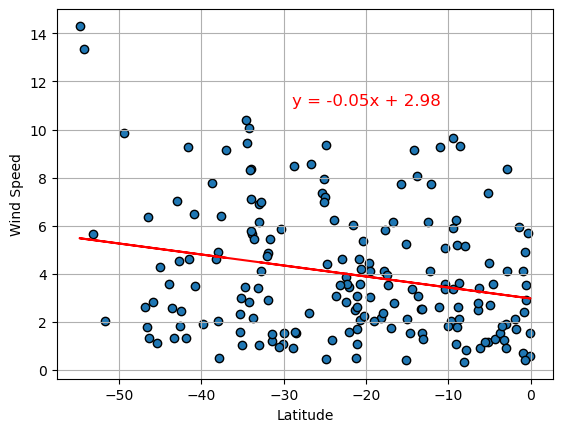

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
linregression = x_values * slope + intercept
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The R value is: {rvalue}')

#plot scatter & line
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, linregression, "r-")
plt.annotate(line_graph,(-29,11), fontsize= 12, color = "red")
plt.grid()

**Discussion about the linear relationship:** Based on these graphs, we actually see a slight correlation between latitude and wind speed. As we move further from the equator and closer to the poles, the wind speed increases slightly. More testing would be needed with other random groups of data before we can say for certain if there is a correlation between the two. 